# Модель боевых действий

## Вариант 42

**Инициализация библиотек**

In [1]:
import numpy as np
from math import cos, sin
from scipy.integrate import odeint
import matplotlib.pyplot as plt

**Начальные данные**

In [2]:
x0 = 45000
y0 = 50000
t0 = 0 

tmax = 1
dt = 0.05

t = np.arange(t0,tmax,dt)

v0 = np.array([x0, y0])

### Модель боевых действий №1

Введём необходимые коэффициенты для модели боевых действий между регулярными войсками.

In [3]:
a = 0.29
b = 0.67
c = 0.6
h = 0.38

Далее, необходимо определить функции $P(t)$ и $Q(t)$, а также необходимую нам функцию для системы дифференциальных уравнений.

In [4]:
def P(t): 
    return abs(sin(t) + 1)

def Q(t):
    return abs(cos(t) + 1)

def derY1(y,t):
    dy1 = -a*y[0] - b*y[1] + P(t)
    dy2 = -c*y[0] - h*y[1] + Q(t)
    return [dy1, dy2]

Далее, решим систему дифференциальных уравнений с помощью функции `odeint` и построим модель графически.

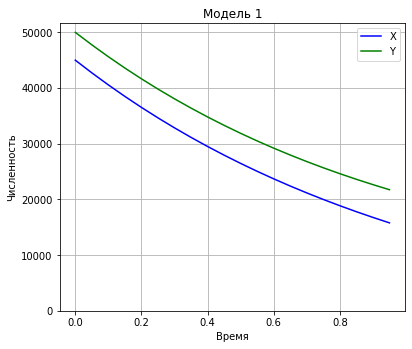

In [6]:
y = odeint(derY1, v0, t)
data1 = [y_i[0] for y_i in y]
data2 = [y_i[1] for y_i in y]

plt.plot(t, data1, 'b', label='X') 
plt.plot(t, data2, 'g', label='Y')
plt.title('Модель 1')
plt.xlabel('Время')
plt.ylabel('Численность')
plt.ylim(0, None)
plt.legend()
plt.grid(True)
plt.margins(0.05)
plt.subplots_adjust(left=0, bottom=0, right=0.8, top=1)

### Модель боевых действий №2

Переопределим коэфициенты для модели ведения боевых действий с участием регулярных войск и партизанских отрядов.

In [7]:
a = 0.31
b = 0.67
c = 0.42
h = 0.53

Также переопределим функции $P(t)$ и $Q(t)$, модифицируем для данной модели СДУ.

In [8]:
def P(t):
    return 2*abs(sin(2*t))

def Q(t):
    return abs(cos(t)+1)

def derY2(y,t):
    dy1 = -a*y[0] - b*y[1] + P(t)
    dy2 = -c*y[0]*y[1] - h*y[1] + Q(t)
    return [dy1, dy2]

Повторно решим нашу СДУ при новых условиях.

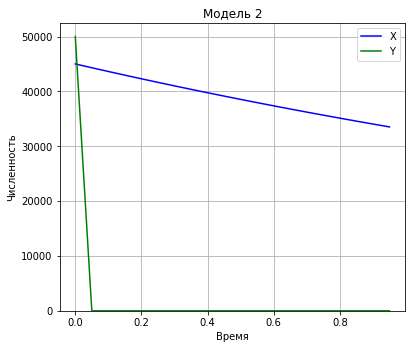

In [10]:
y = odeint(derY2, v0, t)
dataset_1 = [y_i[0] for y_i in y]
dataset_2 = [y_i[1] for y_i in y]

plt.plot(t, dataset_1, 'b', label='X') 
plt.plot(t, dataset_2, 'g', label='Y')
plt.title('Модель 2')
plt.xlabel('Время')
plt.ylabel('Численность')
plt.ylim(0, None)
plt.legend()
plt.grid(True)
plt.margins(0.05)
plt.subplots_adjust(left=0, bottom=0, right=0.8, top=1)

##  Выводы

По построенным моделям можно судить, что при участии партизанских отрядов, армия Y понесет значительные потери, в отличие от первого случая, когда функции потерь обеих армий ведут себя приблизительно одинаково.